In [204]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [205]:
train_data.drop(["id"] , axis=1 , inplace=True)
test_data.drop(["id"] , axis=1 , inplace=True)

In [206]:
#Impute the Feature
median_train_1 = train_data["Time_spent_Alone"].median()
train_data["Time_spent_Alone"] = train_data["Time_spent_Alone"].fillna(median_train_1)
median_test_1 = test_data["Time_spent_Alone"].median()
test_data["Time_spent_Alone"] = test_data["Time_spent_Alone"].fillna(median_test_1)

model_train_1 = train_data["Stage_fear"].mode()[0]
model_test_1 = test_data["Stage_fear"].mode()[0]
train_data["Stage_fear"] = train_data["Stage_fear"].fillna(model_train_1)
test_data["Stage_fear"] = test_data["Stage_fear"].fillna(model_test_1)


In [207]:
median_train_2 = train_data["Social_event_attendance"].median()
train_data["Social_event_attendance"] = train_data["Social_event_attendance"].fillna(median_train_2)
median_test_2 = test_data["Social_event_attendance"].median()
test_data["Social_event_attendance"] = test_data["Social_event_attendance"].fillna(median_test_2)

In [208]:
median_train_3 = train_data["Going_outside"].median()
train_data["Going_outside"] = train_data["Going_outside"].fillna(median_train_3)
median_test_3 = test_data["Going_outside"].median()
test_data["Going_outside"] = test_data["Going_outside"].fillna(median_test_3)

In [209]:
median_train_4 = train_data["Friends_circle_size"].median()
train_data["Friends_circle_size"] = train_data["Friends_circle_size"].fillna(median_train_4)
median_test_4 = test_data["Friends_circle_size"].median()
test_data["Friends_circle_size"] = test_data["Friends_circle_size"].fillna(median_test_4)

In [210]:
median_train_5 = train_data["Post_frequency"].median()
train_data["Post_frequency"] = train_data["Post_frequency"].fillna(median_train_5)
median_test_5 = test_data["Post_frequency"].median()
test_data["Post_frequency"] = test_data["Post_frequency"].fillna(median_test_5)

In [211]:
model_train_6 = train_data["Drained_after_socializing"].mode()[0]
model_test_6 = test_data["Drained_after_socializing"].mode()[0]
train_data["Drained_after_socializing"] = train_data["Drained_after_socializing"].fillna(model_train_6)
test_data["Drained_after_socializing"] = test_data["Drained_after_socializing"].fillna(model_test_6)

In [213]:
#Target Encoding
target_encoder = LabelEncoder()
train_data["Personality"] = target_encoder.fit_transform(train_data["Personality"])

In [214]:
#Feature Engineering
train_data['social_preference'] = train_data['Social_event_attendance'] - train_data['Going_outside']
test_data['social_preference'] = test_data['Social_event_attendance'] - test_data['Going_outside']
train_data['social_engagement'] = train_data['Going_outside'] * train_data['Social_event_attendance']
test_data['social_engagement'] = test_data['Going_outside'] * test_data['Social_event_attendance']
train_data['alone_ratio'] = train_data['Time_spent_Alone'] / 11  
test_data['alone_ratio'] = test_data['Time_spent_Alone'] / 11
train_data['online_vs_offline'] = train_data['Post_frequency'] / (train_data['Friends_circle_size'] + 1)  # +1 to avoid division by zero
test_data['online_vs_offline'] = test_data['Post_frequency'] / (test_data['Friends_circle_size'] + 1)
train_data['social_discomfort'] = train_data['Stage_fear'] + train_data['Drained_after_socializing']
test_data['social_discomfort'] = test_data['Stage_fear'] + test_data['Drained_after_socializing']

In [215]:
x = train_data.drop(["Personality"] , axis= 1)
y = train_data["Personality"]

In [216]:
from xgboost import XGBClassifier

# Baseline configuration
params = {
    'max_depth': 4,              
    'min_child_weight': 3,  
    'learning_rate': 0.1,        
    'n_estimators': 100,      
    'subsample': 0.8,            
    'colsample_bytree': 0.8,     
    'reg_alpha': 0.1,           
    'reg_lambda': 1.0,           
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42,
    'tree_method': 'hist',
          
}

model = XGBClassifier(**params)

In [217]:
model.fit(x , y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [218]:
from sklearn.metrics import roc_auc_score , confusion_matrix

y_pred = model.predict(x)
y_pred_proba = model.predict_proba(x)
print(confusion_matrix(y , y_pred))
print(roc_auc_score(y , y_pred))

[[13441   258]
 [  306  4519]]
0.9588734096925496


In [219]:
test_data_predict = model.predict(test_data)

In [220]:
test_data_predict_encoder = target_encoder.inverse_transform(test_data_predict)
test_data_predict_encoder

array(['Extrovert', 'Introvert', 'Extrovert', ..., 'Extrovert',
       'Extrovert', 'Introvert'], dtype=object)

In [221]:
#Submisson
train = pd.read_csv("test.csv")
submisson = pd.DataFrame({
    "id" : train["id"],
    "Personality" : test_data_predict_encoder
})

submisson.to_csv("submisson.csv" , index=False)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

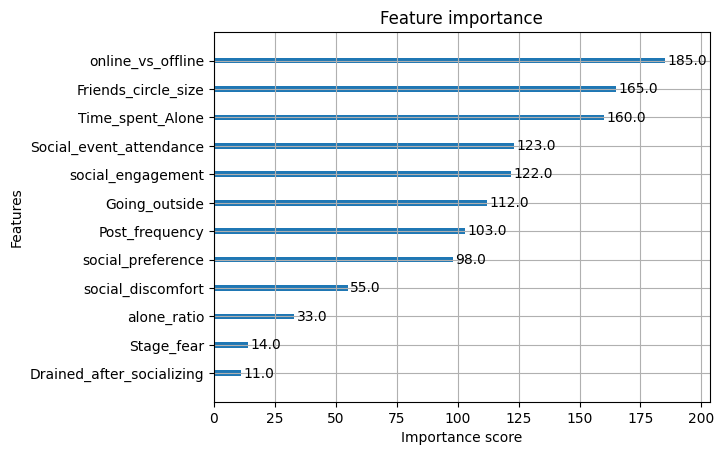

In [222]:
import xgboost as xgb

xgb.plot_importance(model)